## E-Commerce Project

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
%matplotlib inline

#### Get the Data

In [3]:
df = pd.read_csv('./Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Exploratory Data Analysis

#### Compare time spent on website and Yearly amount spent.

&lt;seaborn.axisgrid.JointGrid at 0x115467b65b0&gt;

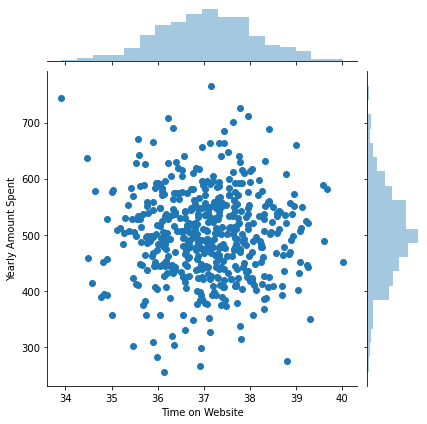

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=df)

#### Compare time spent on website and Yearly amount spent.

&lt;seaborn.axisgrid.JointGrid at 0x1154625f280&gt;

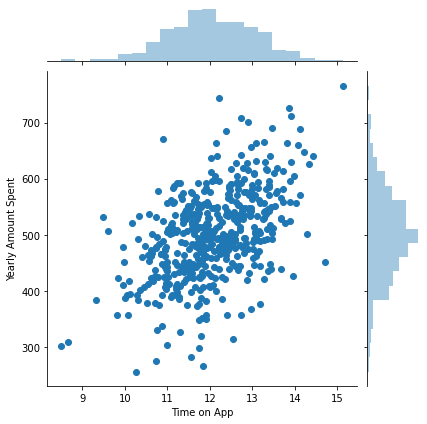

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=df)

### Compare Time on App and Length of Membership

&lt;seaborn.axisgrid.JointGrid at 0x115458ee970&gt;

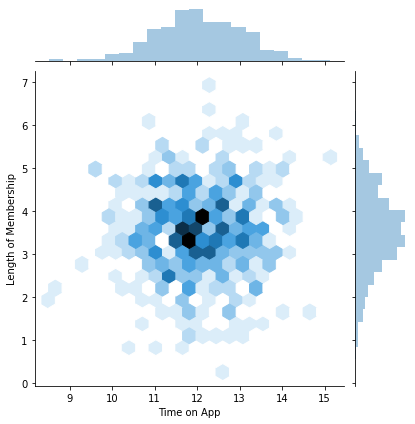

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership', data=df, kind='hex')

### create a pairplot

&lt;seaborn.axisgrid.PairGrid at 0x11544691280&gt;

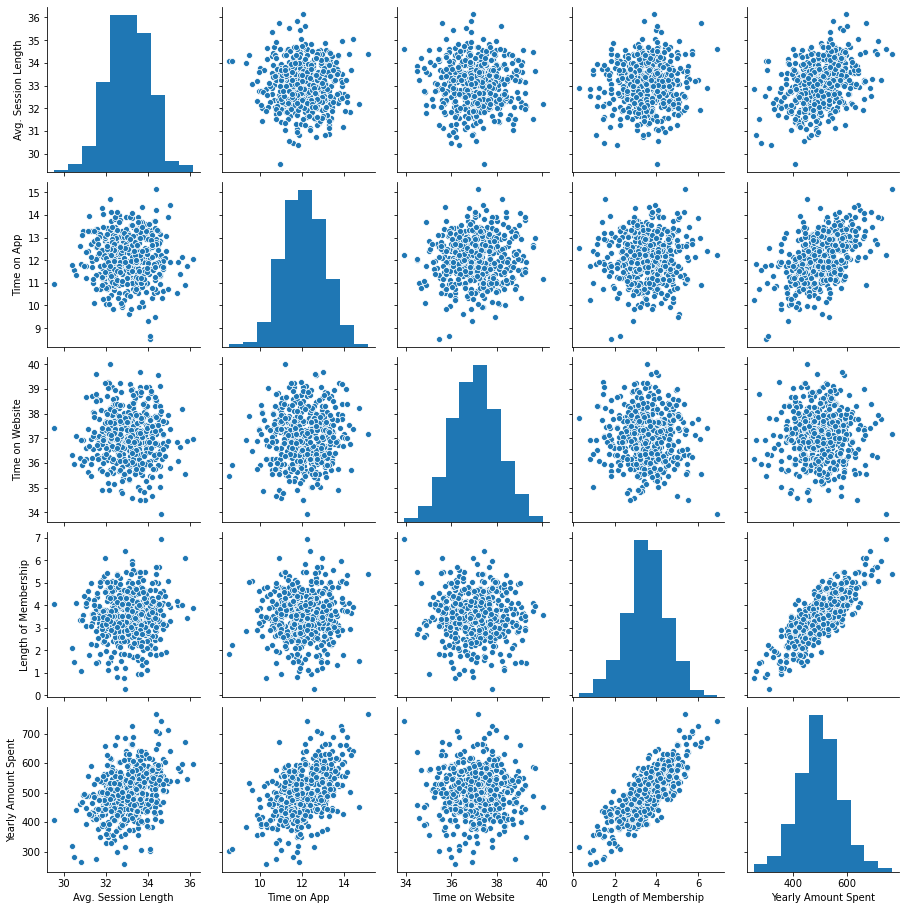

In [10]:
sns.pairplot(df)

### Which is most correlated feature

&lt;AxesSubplot:&gt;

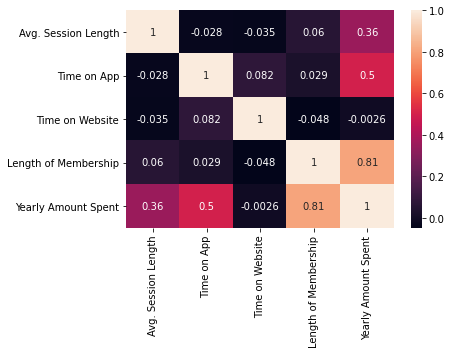

In [12]:
sns.heatmap(df.corr(), annot=True)

#### It looks like Yearly Amount spent and Length of membership are most correlated
#### 0.81 value

### Linear Model of yearly Amount spent and Lenght of membership

&lt;seaborn.axisgrid.FacetGrid at 0x11545381910&gt;

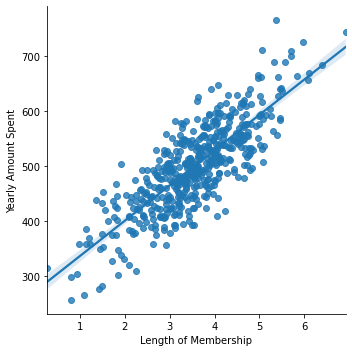

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent', data=df)

### Training and Testing Data

#### X -> All features except yearly amount spent
#### y -> yearly amount spent

In [14]:
df.columns

Index([&#39;Email&#39;, &#39;Address&#39;, &#39;Avatar&#39;, &#39;Avg. Session Length&#39;, &#39;Time on App&#39;,
       &#39;Time on Website&#39;, &#39;Length of Membership&#39;, &#39;Yearly Amount Spent&#39;],
      dtype=&#39;object&#39;)

In [24]:
# for X we will drop the non-numerical and yearly amount spent columns
X = df.drop(axis=1, columns=['Email','Address','Avatar','Yearly Amount Spent'])
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [25]:
X.columns

Index([&#39;Avg. Session Length&#39;, &#39;Time on App&#39;, &#39;Time on Website&#39;,
       &#39;Length of Membership&#39;],
      dtype=&#39;object&#39;)

In [26]:
y = df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

### Train_Test_Split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Train the model

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
y_preds = reg.predict(X_test)

In [32]:
reg.intercept_

-1030.2946829356238

In [33]:
reg.coef_

array([ 2.56454836e+01,  3.85929091e+01, -2.62324124e-02,  6.17444867e+01])

&lt;matplotlib.collections.PathCollection at 0x11545531d90&gt;

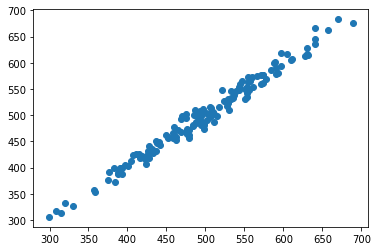

In [34]:
plt.scatter(y_test, y_preds)

### Residuals

&lt;AxesSubplot:xlabel=&#39;Yearly Amount Spent&#39;&gt;

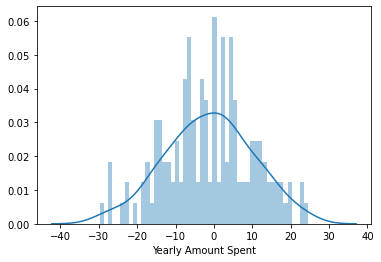

In [48]:
sns.distplot((y_test-y_preds), bins=50)

### Metrics Evaluation

In [45]:
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
mean_absolute_error(y_test, y_preds)

9.131344882513256

In [43]:
mean_squared_error(y_test, y_preds)

129.36028489037355

In [44]:
np.sqrt(mean_squared_error(y_test,y_preds))

11.373666290619465

In [46]:
r2_score(y_test, y_preds)

0.9791668397928561

In [52]:
pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Avg. Session Length,25.645484
Time on App,38.592909
Time on Website,-0.026232
Length of Membership,61.744487


### Interpreting from above data, looks like time on website is NOT good, rest all looks good